In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterion = nn.BCELoss().to(device)

G_losses, D_losses = [], []

In [5]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterion(output_real, label_real)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterion(output_fake, label_fake)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            output = netD(data_fake).view(-1)
            errG = criterion(output, label_real)

            errG.backward()
            D_G_z2 = output.mean().item()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f / %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

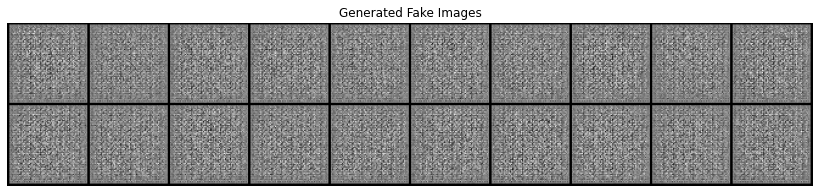

In [6]:
generate_images(netG)

In [7]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 2.0015   Loss_G: 4.0415   D(x): 0.4296   D(G(z)): 0.5745 / 0.0249
[100/468]   Loss_D: 0.0686   Loss_G: 6.4621   D(x): 0.9635   D(G(z)): 0.0260 / 0.0021
[200/468]   Loss_D: 0.2108   Loss_G: 4.6841   D(x): 0.9142   D(G(z)): 0.0914 / 0.0217
[300/468]   Loss_D: 0.1429   Loss_G: 4.0102   D(x): 0.9264   D(G(z)): 0.0565 / 0.0282
[400/468]   Loss_D: 0.1012   Loss_G: 4.1515   D(x): 0.9660   D(G(z)): 0.0603 / 0.0245
   EPOCH:  1
[000/468]   Loss_D: 0.0590   Loss_G: 4.2638   D(x): 0.9726   D(G(z)): 0.0295 / 0.0204
[100/468]   Loss_D: 0.6696   Loss_G: 0.0813   D(x): 0.5666   D(G(z)): 0.0016 / 0.9287
[200/468]   Loss_D: 0.1640   Loss_G: 3.6748   D(x): 0.9068   D(G(z)): 0.0549 / 0.0377
[300/468]   Loss_D: 0.1058   Loss_G: 3.6102   D(x): 0.9152   D(G(z)): 0.0065 / 0.0463
[400/468]   Loss_D: 0.2326   Loss_G: 4.0062   D(x): 0.8257   D(G(z)): 0.0171 / 0.0368
   EPOCH:  2
[000/468]   Loss_D: 0.1604   Loss_G: 3.4909   D(x): 0.9106   D(G(z)): 0.0531 / 0.0483
[100/468]   Los

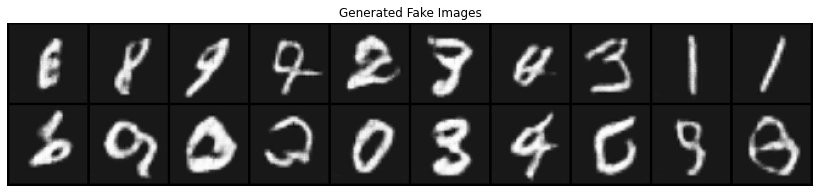

In [8]:
generate_images(netG)

In [9]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 1.5660   Loss_G: 1.2814   D(x): 0.3026   D(G(z)): 0.0478 / 0.3361
[100/468]   Loss_D: 0.5201   Loss_G: 2.6730   D(x): 0.8566   D(G(z)): 0.2473 / 0.1023
[200/468]   Loss_D: 0.0516   Loss_G: 4.2418   D(x): 0.9562   D(G(z)): 0.0053 / 0.0264
[300/468]   Loss_D: 0.0203   Loss_G: 5.8911   D(x): 0.9834   D(G(z)): 0.0033 / 0.0053
[400/468]   Loss_D: 0.2332   Loss_G: 2.9870   D(x): 0.8328   D(G(z)): 0.0195 / 0.0780
   EPOCH:  1
[000/468]   Loss_D: 0.0249   Loss_G: 5.1153   D(x): 0.9870   D(G(z)): 0.0116 / 0.0104
[100/468]   Loss_D: 0.0119   Loss_G: 6.1562   D(x): 0.9922   D(G(z)): 0.0037 / 0.0047
[200/468]   Loss_D: 0.3194   Loss_G: 4.4707   D(x): 0.9604   D(G(z)): 0.2066 / 0.0200
[300/468]   Loss_D: 0.2394   Loss_G: 3.7566   D(x): 0.9215   D(G(z)): 0.1265 / 0.0376
[400/468]   Loss_D: 0.0352   Loss_G: 5.4948   D(x): 0.9802   D(G(z)): 0.0146 / 0.0084
   EPOCH:  2
[000/468]   Loss_D: 0.0215   Loss_G: 5.9881   D(x): 0.9923   D(G(z)): 0.0133 / 0.0058
[100/468]   Los

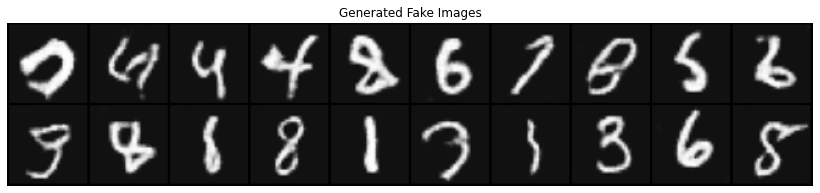

In [10]:
generate_images(netG)

In [11]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 5.8705   Loss_G: 1.3987   D(x): 0.0169   D(G(z)): 0.0001 / 0.3676
[100/468]   Loss_D: 0.0370   Loss_G: 4.4287   D(x): 0.9696   D(G(z)): 0.0052 / 0.0213
[200/468]   Loss_D: 0.0576   Loss_G: 4.8083   D(x): 0.9472   D(G(z)): 0.0003 / 0.0172
[300/468]   Loss_D: 0.0065   Loss_G: 6.6492   D(x): 0.9982   D(G(z)): 0.0046 / 0.0027
[400/468]   Loss_D: 0.0097   Loss_G: 6.4343   D(x): 0.9969   D(G(z)): 0.0065 / 0.0037
   EPOCH:  1
[000/468]   Loss_D: 0.8005   Loss_G: 2.0923   D(x): 0.7661   D(G(z)): 0.3606 / 0.1641
[100/468]   Loss_D: 0.7254   Loss_G: 2.8741   D(x): 0.9809   D(G(z)): 0.4087 / 0.1138
[200/468]   Loss_D: 0.1137   Loss_G: 3.3280   D(x): 0.9146   D(G(z)): 0.0196 / 0.0632
[300/468]   Loss_D: 0.1223   Loss_G: 4.9121   D(x): 0.9731   D(G(z)): 0.0796 / 0.0127
[400/468]   Loss_D: 0.0337   Loss_G: 5.2082   D(x): 0.9934   D(G(z)): 0.0258 / 0.0097
   EPOCH:  2
[000/468]   Loss_D: 0.0195   Loss_G: 6.2226   D(x): 0.9827   D(G(z)): 0.0015 / 0.0045
[100/468]   Los

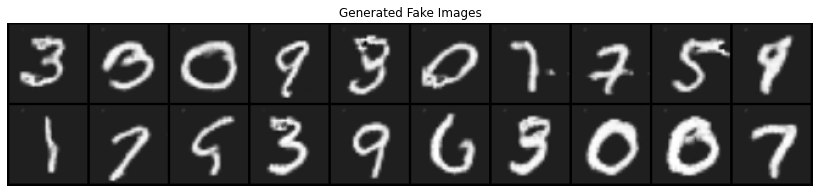

In [12]:
generate_images(netG)

In [13]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0038   Loss_G: 7.3976   D(x): 0.9978   D(G(z)): 0.0016 / 0.0014
[100/468]   Loss_D: 0.0007   Loss_G: 8.2858   D(x): 0.9998   D(G(z)): 0.0004 / 0.0006
[200/468]   Loss_D: 0.0010   Loss_G: 8.0005   D(x): 0.9996   D(G(z)): 0.0006 / 0.0007
[300/468]   Loss_D: 0.0012   Loss_G: 7.7993   D(x): 0.9997   D(G(z)): 0.0009 / 0.0011
[400/468]   Loss_D: 0.0024   Loss_G: 8.3131   D(x): 0.9980   D(G(z)): 0.0004 / 0.0005
   EPOCH:  1
[000/468]   Loss_D: 0.4875   Loss_G: 1.7417   D(x): 0.7671   D(G(z)): 0.1316 / 0.2437
[100/468]   Loss_D: 0.0718   Loss_G: 5.3386   D(x): 0.9501   D(G(z)): 0.0154 / 0.0119
[200/468]   Loss_D: 0.6023   Loss_G: 3.7937   D(x): 0.9322   D(G(z)): 0.3603 / 0.0373
[300/468]   Loss_D: 0.3349   Loss_G: 2.7351   D(x): 0.9014   D(G(z)): 0.1823 / 0.0939
[400/468]   Loss_D: 0.3212   Loss_G: 7.3659   D(x): 0.9905   D(G(z)): 0.2325 / 0.0012
   EPOCH:  2
[000/468]   Loss_D: 0.7309   Loss_G: 2.8575   D(x): 0.6054   D(G(z)): 0.0832 / 0.0983
[100/468]   Los

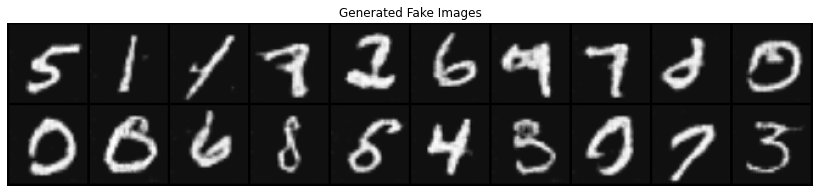

In [14]:
generate_images(netG)

In [15]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0864   Loss_G: 4.4022   D(x): 0.9615   D(G(z)): 0.0412 / 0.0235
[100/468]   Loss_D: 1.1800   Loss_G: 1.6122   D(x): 0.6926   D(G(z)): 0.4598 / 0.2794
[200/468]   Loss_D: 0.0565   Loss_G: 4.6103   D(x): 0.9678   D(G(z)): 0.0215 / 0.0185
[300/468]   Loss_D: 13.5866   Loss_G: 1.6094   D(x): 0.0000   D(G(z)): 0.0000 / 0.3533
[400/468]   Loss_D: 0.4475   Loss_G: 2.5052   D(x): 0.7373   D(G(z)): 0.0722 / 0.1318
   EPOCH:  1
[000/468]   Loss_D: 0.0448   Loss_G: 6.0154   D(x): 0.9946   D(G(z)): 0.0371 / 0.0046
[100/468]   Loss_D: 0.6894   Loss_G: 1.9594   D(x): 0.7108   D(G(z)): 0.2289 / 0.2096
[200/468]   Loss_D: 0.3071   Loss_G: 3.2048   D(x): 0.8024   D(G(z)): 0.0482 / 0.0663
[300/468]   Loss_D: 0.0185   Loss_G: 5.5993   D(x): 0.9956   D(G(z)): 0.0138 / 0.0076
[400/468]   Loss_D: 2.8265   Loss_G: 0.0000   D(x): 0.1283   D(G(z)): 0.0000 / 1.0000
   EPOCH:  2
[000/468]   Loss_D: 2.2740   Loss_G: 2.6047   D(x): 0.9872   D(G(z)): 0.8233 / 0.1293
[100/468]   Lo

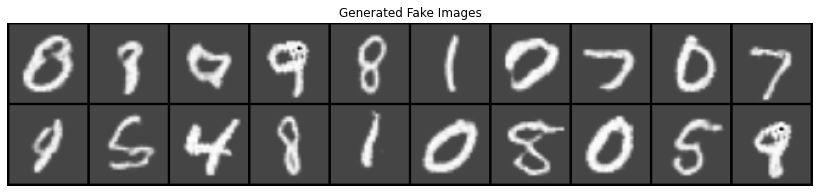

In [21]:
generate_images(netG)

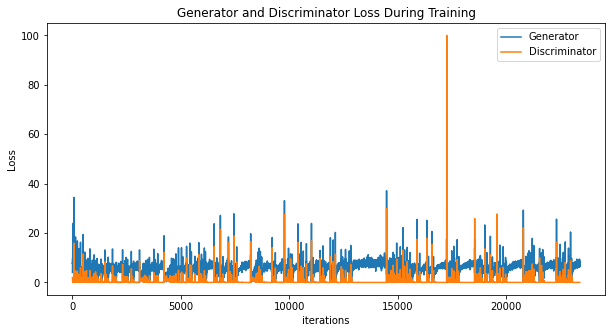

In [17]:
plot_losses(G_losses, D_losses)